In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
sys.path.append('../')
import os
import curvedsky as cs

In [2]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction

In [3]:
rec_nofg = Reconstruction.from_ini('LB_FG0.ini')


DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/Data/surveys.pkl
SIMULATION INFO: CMB Realisation - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
SIMULATION INFO: Foreground - /global/cscratch1/sd/lonappan/S4BIRD/FG
SIMULATION INFO: Foreground Model - s0d0
SIMULATION INFO: Foreground included - False
SIMULATION INFO: Number of simulations - 500
SIMULATION INFO: Frequency range - 0.0 GHz - 500.0 GHz
SIMULATION INFO: NSIDE - 512
SIMULATION INFO: Output folder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/noFG
FILTERING INFO: Outfolder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/noFG/Filtered
FILTERING INFO: Mask path - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits
FILTERING INFO: fsky - 0.7990690867106119
FILTERING INFO: Beam - 15.0 arcmin
QUEST INFO: Maximum L - 1024
QUEST INFO: Minimum CMB multipole - 2
QUEST INFO: Maximum CMB multipole - 600
QU

In [4]:
rec_fg = Reconstruction.from_ini('LB_FG2.ini')

DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/Data/surveys.pkl
SIMULATION INFO: CMB Realisation - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
SIMULATION INFO: Foreground - /global/cscratch1/sd/lonappan/S4BIRD/FG
SIMULATION INFO: Foreground Model - s1d1
SIMULATION INFO: Foreground included - True
SIMULATION INFO: Number of simulations - 500
SIMULATION INFO: Frequency range - 0.0 GHz - 500.0 GHz
SIMULATION INFO: NSIDE - 512
SIMULATION INFO: Output folder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/s1d1
FILTERING INFO: Outfolder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/s1d1/Filtered
FILTERING INFO: Mask path - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits
FILTERING INFO: fsky - 0.7990690867106119
FILTERING INFO: Beam - 15.0 arcmin
QUEST INFO: Maximum L - 1024
QUEST INFO: Minimum CMB multipole - 2
QUEST INFO: Maximum CMB multipole - 600
QUE

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:413: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(self.Lfac*(self.MCN0()/self.response_mean()**2 ),label='MCN0',c='r')


100


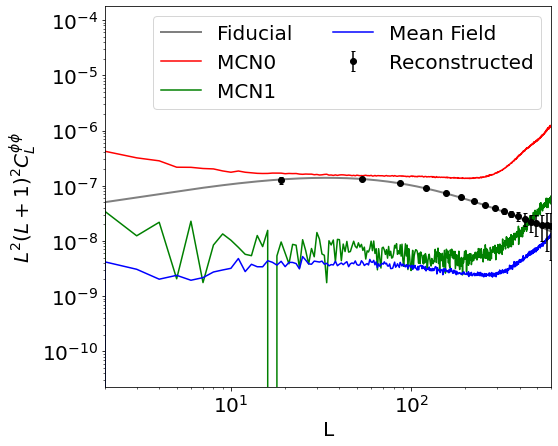

In [5]:
rec_nofg.plot_qcl_stat(n=400,n1=True)

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:413: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(self.Lfac*(self.MCN0()/self.response_mean()**2 ),label='MCN0',c='r')


100


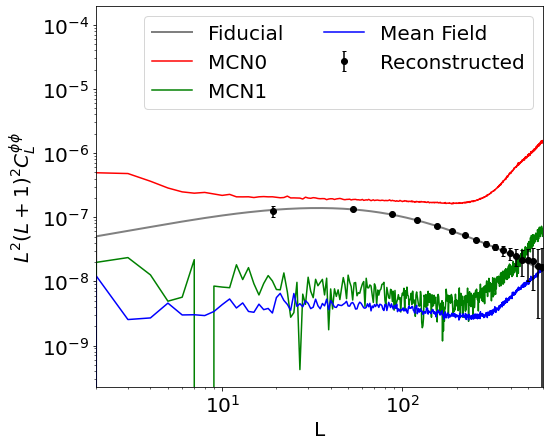

In [6]:
rec_fg.plot_qcl_stat(n=400,n1=True)

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:413: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(self.Lfac*(self.MCN0()/self.response_mean()**2 ),label='MCN0',c='r')


100


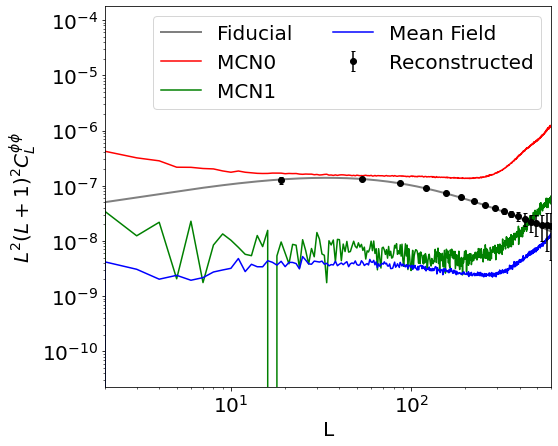

In [7]:
rec_nofg.plot_qcl_stat(n=400,n1=True)

In [8]:
rec_fg.SNR_phi(400)

39.49561282360286

In [9]:
rec_nofg.SNR_phi(400)

40.23890423821647

In [12]:
nofg_cl = rec_nofg.get_qcl_wR_stat(n=400,n1=True)
fg_cl = rec_fg.get_qcl_wR_stat(n=400,n1=True)
fid = rec_fg.bin_cell(rec_fg.cl_pp*rec_fg.Lfac)

/tmp/ipykernel_57831/3273835100.py:7: RuntimeWarning: invalid value encountered in true_divide
  axs[0].semilogy(rec_fg.Lfac*(rec_fg.MCN0()/rec_fg.response_mean()**2 ),label='FG-MCN0',c='r',)
/tmp/ipykernel_57831/3273835100.py:8: RuntimeWarning: invalid value encountered in true_divide
  axs[0].semilogy(rec_nofg.Lfac*(rec_nofg.MCN0()/rec_nofg.response_mean()**2 ),label='NOFG-MCN0',c='b')


100
100
100


Text(0.5, 0, '$L$')

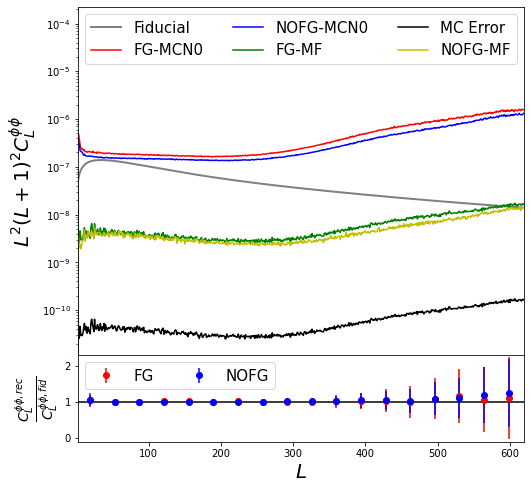

In [20]:
fig, axs = plt.subplots(2, 1,figsize=(8,8), gridspec_kw={'height_ratios': [4, 1]}, sharex=True)
plt.setp(axs, xlim=(2,620))
fig.subplots_adjust(hspace=0)


axs[0].semilogy(rec_fg.cl_pp*rec_fg.Lfac,label='Fiducial',c='grey',lw=2)
axs[0].semilogy(rec_fg.Lfac*(rec_fg.MCN0()/rec_fg.response_mean()**2 ),label='FG-MCN0',c='r',)
axs[0].semilogy(rec_nofg.Lfac*(rec_nofg.MCN0()/rec_nofg.response_mean()**2 ),label='NOFG-MCN0',c='b')
axs[0].semilogy(rec_fg.Lfac*rec_fg.mean_field_cl(),label='FG-MF',c='g')
axs[0].semilogy(rec_fg.Lfac*rec_fg.mean_field_cl()/100,label='MC Error',c='k')
axs[0].semilogy(rec_nofg.Lfac*rec_nofg.mean_field_cl(),label='NOFG-MF',c='y')
axs[0].legend(ncol=3, fontsize=15)
#axs[0].set_ylim(1e-9,1e-5)
axs[0].set_ylabel('$L^2 (L + 1)^2 C_L^{\phi\phi}$',fontsize=20)


axs[1].errorbar(rec_fg.B,fg_cl.mean(axis=0)/fid,yerr=fg_cl.std(axis=0)/fid,label='FG',c='r',fmt='o')
axs[1].errorbar(rec_fg.B,nofg_cl.mean(axis=0)/fid,yerr=nofg_cl.std(axis=0)/fid,label='NOFG',c='b',fmt='o')
axs[1].set_ylim(-0.1,2.3)
axs[1].legend(ncol=2, fontsize=15,loc='upper left')
axs[1].axhline(1,c='k')
axs[1].set_ylabel('$\\frac{C_L^{\phi\phi,rec}}{C_L^{\phi\phi,fid}}$',fontsize=20)
axs[1].set_xlabel('$L$',fontsize=20)
